<a href="https://colab.research.google.com/github/jwmckeown007/astr19groupf/blob/main/ASTR19ProjTestyTesty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
from astropy.table import Table
%matplotlib inline

In [2]:
#define x and y
n = 200
x = np.linspace(0, 2*np.pi, n)

noise = 0.7
sigma = 3

y = 0.5 * np.sin(np.pi * x) + 0.5 + (noise * np.random.randn(n))
                                #This part makes the function more random everywhere
#y = 2 * np.sin(x * np.random.randn(n)) + 0.1 * np.random.randn(n)
y_err = np.full(n, np.random.random() * sigma)

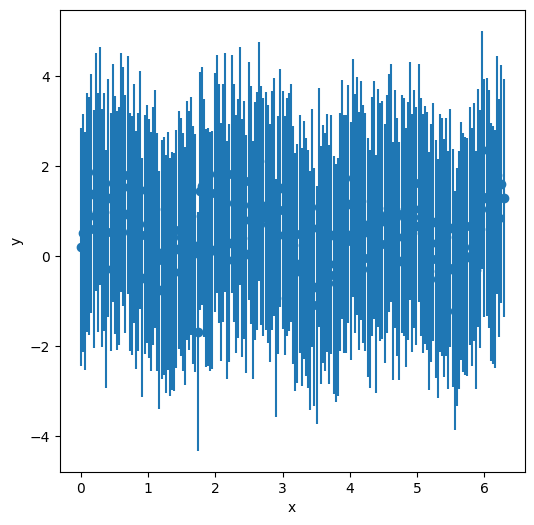

In [3]:
#plot the data
f = plt.figure(figsize = (6, 6)) #empty figure 6x6 inches
plt.errorbar(x, y, y_err, fmt='o')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [4]:
v_shift = np.mean(y) #this is the most accurate vertical shift possible
                     #defined early to be accessed in later instantiations

amplitude1 = (np.max(y) - np.min(y))/2 #defines the amplitude to be the difference between
                                      #The max y and the min y divided by 2
                                          #The amp is divided by 2 to give an idea for the midpoint of oscilation

amplitude = np.mean(np.abs(y)) - v_shift #defines the amplitude to be the mean of y where all values are set to be >= 0
                               #the advantage of this amplitude is that it is definitively the least far away amplitude if dealing with a lot of outliers

ampli3de = np.std(abs(y))

ampli2de = np.mean(y) #this amplitude was just to test the difference if not taking the abs

#Might be good to mess with ideas of standard deviation and variance rather than just the mean

h_shift = 0
  #to find this value, we should try and find the location where x is closest to the vertical shift

period = 2

def f_curve(x, a, b, c, d):
    return a * np.sin(2.0 * np.pi*(x - b) / c) + d

initial_guess = [amplitude, h_shift, period, v_shift]
print(ampli2de)
print(amplitude1)
print(amplitude)
print(np.std(y))

params, params_cov = optimize.curve_fit(f_curve, x, y, sigma = y_err, absolute_sigma = True,
                                       p0 = initial_guess)

0.5718669031030174
2.02053104337445
0.16409848706246244
0.6994595643112503


Fitted parameters: [ 0.49103082 -0.08469122  2.01571419  0.55992396]


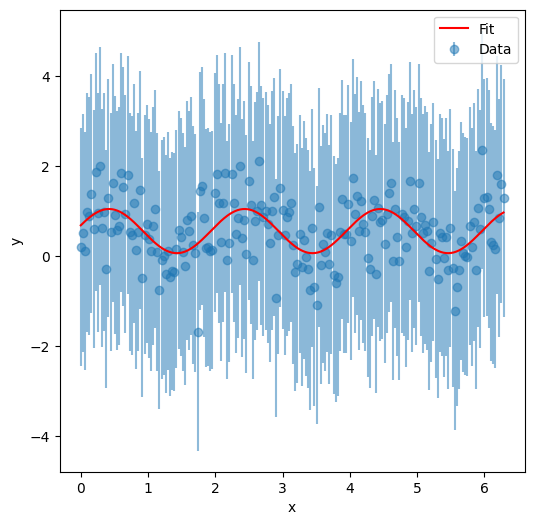

In [5]:
#in particularly difficult cases, we can also provide the boundaries to explore parameter ranges
#The bounds are set to be adaptive to our guesses so we don't need to rewrite them every time

rfe = 2 #defines the room for error
        #Should be a positive value

low_bound = [np.ceil(initial_guess[0]) - rfe, np.ceil(initial_guess[1]) - rfe, np.ceil(initial_guess[2]) - rfe, np.ceil(initial_guess[3]) - rfe]
    #Sets every value in the initial guess to be mapped to the ceiling of the value at the given index -1
high_bound = [np.floor(initial_guess[0]) + rfe, np.floor(initial_guess[1]) + rfe, np.floor(initial_guess[2]) + rfe, np.floor(initial_guess[3]) + rfe]
    #Sets every value in the initial guess to be mapped to the floor of the value at the given index +1
params, params_cov = optimize.curve_fit(f_curve, x, y, sigma = y_err, absolute_sigma = True,
                                       p0 = initial_guess, bounds = (low_bound, high_bound))

print(f"Fitted parameters: {params}")

#let's see how the best fit model looks by plotting it, along with the data
x_fit = np.linspace(0, 2.0*np.pi, 500)
y_fit = f_curve(x_fit, *params) #providing '*params' is called 'unpacking' and is identical to write
                                # 'params[0], params[1], params[2]...'
f = plt.figure(figsize = (6, 6))
plt.errorbar(x, y, y_err, fmt='o', label = 'Data', alpha=0.5, zorder = 1) #data
plt.plot(x_fit, y_fit, 'r-', label='Fit', zorder = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()